In [1]:
import numpy as np
import scipy
from scipy import signal
from matplotlib import pyplot as plt
from scipy.fftpack import fft
t0, t1, N = -15, 15, 1000

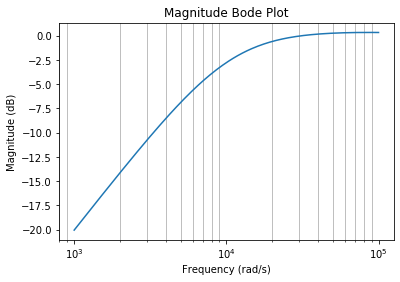

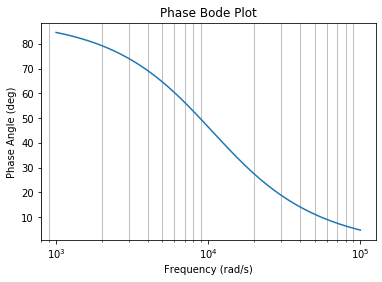

In [200]:
#A3.1.b.)

# function bodec (num,den,flim)
# % This function plots the magnitude and phase Bode plots of the frequency
# % response for an LTIC system. The system is modeled by a transfer function
# % with a numerator polynomial represented by the vector of coefficients "num"
# % and a denominator polynomial represented by the vector of coefficients "den".
# %
# % The frequency range, is entered as an array of the form: flim= [d1,d2,N] where
# % d1 and d2 are the lower and upper limits of the frequency range to be
# % used expressed as integer exponents of 10. e.g. For a lower limit of
# % 0.01 rad/s, enter -2 for d1. For an upper limit of 100 rad/s, enter 2
# % for d2. Enter 200 for N to generate 200 points of data. For this example
# % enter >>flim= [-2,2,200].

def bodec(num, den, flim):
    w = np.logspace(flim[0], flim[1], flim[2]);
    L = len(w)
    nx = np.empty([L], dtype = np.complex128)
    dx = np.empty([L], dtype = np.complex128)
    for k in range(L):
        nx[k] = np.polyval(num, 1j*w[k])
        dx[k] = np.polyval(den, 1j*w[k])
    x =nx/dx
    mdb=20*np.log10(np.abs(x))
    px=180*np.angle(x)/np.pi
    plt.figure()
    plt.semilogx(w,mdb)
    plt.grid(which = "minor", axis = "both") 
    plt.title('Magnitude Bode Plot')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.figure()
    plt.semilogx(w,px)
    plt.grid(which = "minor") 
    plt.title('Phase Bode Plot')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase Angle (deg)')
    
flim = np.array([3, 5, 200])
L = 0.1
R = 1000
C = 5*10**-9
num = np.array([L*R*C, L, 0])
den = np.array([L*R*C, L, R])
#num = np.array([R])
#den = np.array([L, R])
#num = np.array([1e4, 0])
#den = np.array([1, 1e4, 1e8])
bodec(num, den, flim)

Text(0.5, 0, 'Time [ms]')

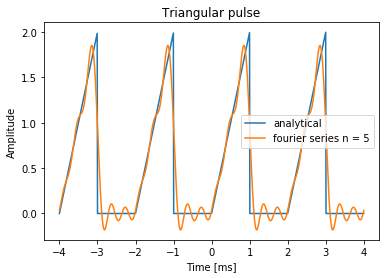

In [4]:
#A3.4.)

tt = np.linspace(-4, 4, N)
triangle = (2+2*(signal.sawtooth(np.pi * tt)))*np.heaviside(tt%2, 1)*np.heaviside(1-tt%2, 1)
#triangle = np.sin(tt)

def Ck(k, t, sign, T):
    C = sign*np.exp(-1j*2*k*np.pi*t/T)
    return np.sum(C)/len(C)

def f(t, sign, T, Nh, x):
    F = np.array([2*Ck(i, t, sign, T)*np.exp(1j*2*i*np.pi*x/T) for i in range(1, Nh+1)])
    return np.sum(F) + Ck(0, t, sign, T)


FS = np.array([np.real(f(tt, triangle, 2, 5, x)) for x in tt])

plt.plot(tt,triangle, label="analytical")
plt.plot(tt, FS, label = "fourier series n = 5")
plt.legend()
plt.title("Triangular pulse")
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")

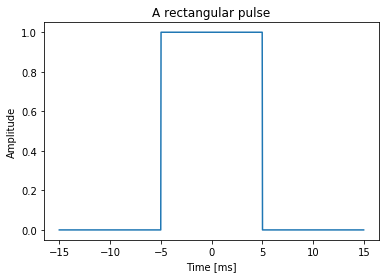

In [198]:
#

#A3.5

t = np.linspace(t0, t1, N, endpoint=False)
rectangle = (0.5+0.5*signal.square(2 * np.pi *(0.05 * (t+5))))*np.heaviside(t+7.5, 1)*np.heaviside(7.5-t, 1)
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("A rectangular pulse")
plt.plot(t, rectangle)

Text(0.5, 0, 'Time [ms]')

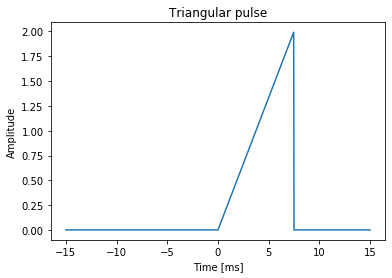

In [144]:
t = np.linspace(t0, t1, N)
triangle = (1+signal.sawtooth(0.267 * np.pi * t))*np.heaviside(t, 1)*np.heaviside(7.5-t, 1)
plt.plot(t,triangle)
plt.title("Triangular pulse")
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")

Text(0.5, 0, 'Time [ms]')

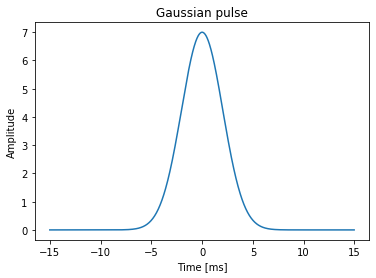

In [16]:
t = np.linspace(t0, t1, N, endpoint=False)
i, q, e = signal.gausspulse(t, fc=1/np.e, bw = 0.5, retquad=True, retenv=True)
e *= 7
plt.plot(t, e)
plt.title("Gaussian pulse")
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")

Text(0.5, 0, 'Time [ms]')

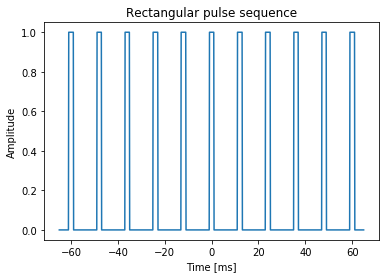

In [107]:
t11 = np.linspace(-65, 65, N, endpoint=False)
plt.figure()
sig = ((t11+1)%12) <= 2
plt.plot(t11, sig)
plt.title("Rectangular pulse sequence")
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")

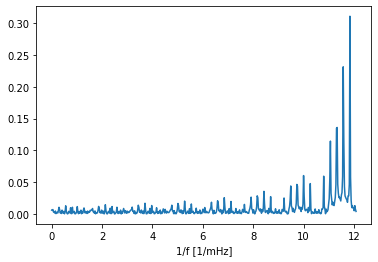

In [204]:
t11 = np.linspace(-65, 65, N, endpoint=False)
sig = ((t11+1)%12) <= 2

Nr = int(N/2)
dt = 2*65/N
yf = fft(sig)
tf = np.pi*np.linspace(0.0, 1.0/(2.0*dt), Nr)
plt.xlabel("1/f [1/mHz]")
plt.ylabel("")
plt.plot(tf, 2/N*np.abs(yf[Nr:]))

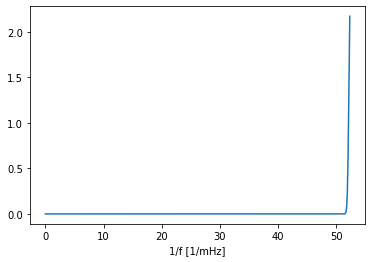

In [205]:
#Highest peak around 1/12 mHz, which corresponds well with analytical value since the rect pulse sequence
#occures with that frequency. For the following fourier transforms there isn't really much to say, because taking
#the fourier transform of something that doesnt repeat won't bring out very interesting results. Reusing the
#convolutions from assignment 2 would have been better in my opinion.


t = np.linspace(t0, t1, N, endpoint=False)
i, q, e = signal.gausspulse(t, fc=1/np.e, bw = 0.5, retquad=True, retenv=True)
e *= 7

Nr = int(N/2)
dt = (t1-t0)/N
yf = fft(e)
tf = np.pi*np.linspace(0.0, 1.0/(2.0*dt), Nr)
plt.xlabel("1/f [1/mHz]")
plt.ylabel("")
plt.plot(tf, 2/N*np.abs(yf[Nr:]))

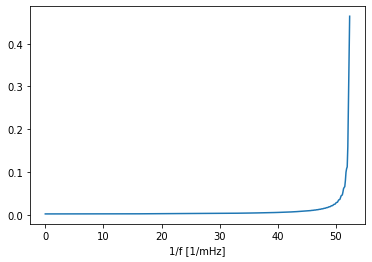

In [206]:
t = np.linspace(t0, t1, N)
triangle = (1+signal.sawtooth(0.267 * np.pi * t))*np.heaviside(t, 1)*np.heaviside(7.5-t, 1)

Nr = int(N/2)
dt = (t1-t0)/N
yf = fft(triangle)
tf = np.pi*np.linspace(0.0, 1.0/(2.0*dt), Nr)
plt.xlabel("1/f [1/mHz]")
plt.ylabel("")
plt.plot(tf, 2/N*np.abs(yf[Nr:]))

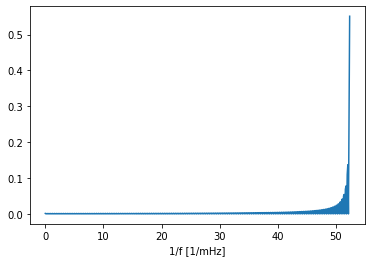

In [207]:
t = np.linspace(t0, t1, N, endpoint=False)
rectangle = (0.5+0.5*signal.square(2 * np.pi *(0.05 * (t+5))))*np.heaviside(t+7.5, 1)*np.heaviside(7.5-t, 1)

Nr = int(N/2)
dt = (t1-t0)/N
yf = fft(rectangle)
tf = np.pi*np.linspace(0.0, 1.0/(2.0*dt), Nr)
plt.xlabel("1/f [1/mHz]")
plt.ylabel("")
plt.plot(tf, 2/N*np.abs(yf[Nr:]))